In [141]:
import numpy as np
from scipy import signal
import matplotlib.mlab as mlab

import matplotlib.pyplot as plt

## Importing the data

In [156]:
l_data = np.genfromtxt('left.csv', delimiter = ',', names = True)[:4882]
r_data = np.genfromtxt('right.csv', delimiter = ',', names = True)

tl_data = np.arange(0, 5e-2 * len(l_data['mean']), 5e-2)
tr_data = np.arange(0, 5e-2 * len(r_data['mean']), 5e-2)

## First look at the data

So, at first glance, the data look quite different, but it's difficult to quantify how

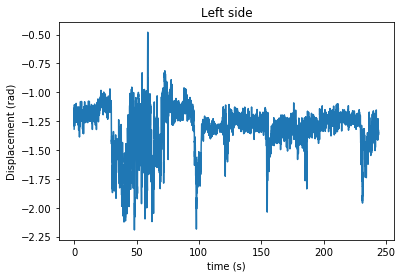

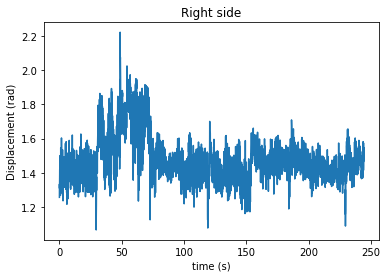

In [158]:
plt.plot(tl_data, l_data['mean'])
plt.xlabel('time (s)')
plt.ylabel('Displacement (rad)')
plt.title('Left side')
plt.show()

plt.plot(tr_data, r_data['mean'])
plt.xlabel('time (s)')
plt.ylabel('Displacement (rad)')
plt.title('Right side')
plt.show()

## Data in the Fourier domain - PSDs

Power spectral densities (PSDs) tell you how much a given frequency contributes to time sequence data.

Looking at the PSDs for the left and right side reveal that the left side has significant contribution from higher frequencies, whereas the right side is basically entirely low-frequency content.

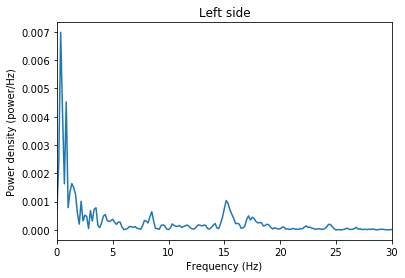

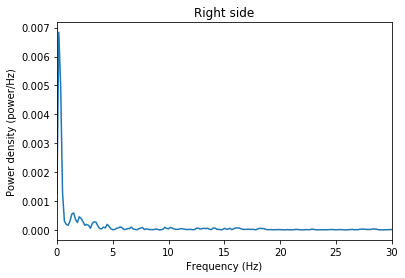

In [160]:
freqs, Pxx = signal.welch(l_data['mean'], fs = 500, nperseg = 3000, scaling = 'spectrum')
plt.plot(freqs, Pxx)
plt.xlim(0,30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power density (power/Hz)')
plt.title('Left side')
plt.show()

freqs, Pxx = signal.welch(r_data['mean'], fs = 500, nperseg = 3000, scaling = 'spectrum')
plt.plot(freqs, Pxx)
plt.xlim(0,30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power density (power/Hz)')
plt.title('Right side')
plt.show()

### Phase

Finally, looking at the phases as functions of frequency, we see that the left and right sides are not _that_ different.  You could quantify how similar they are a number of ways.  Something like a chi-squared would do the job.

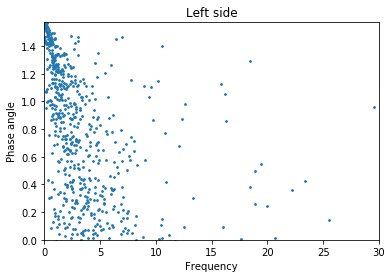

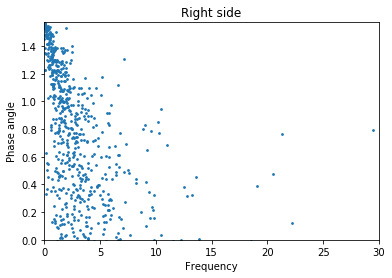

In [185]:
l_spectrum = np.fft.rfft(l_data['mean'])[1:]
l_phase = np.angle(l_spectrum)

r_spectrum = np.fft.rfft(r_data['mean'])[1:]
r_phase = np.angle(r_spectrum)

plt.scatter(np.real(l_spectrum), l_phase, s = 3),
plt.ylim(0,np.pi/2)
plt.xlim(0,30)
plt.ylabel('Phase angle')
plt.xlabel('Frequency')
plt.title('Left side')
plt.show()

plt.scatter(np.real(r_spectrum), r_phase, s = 3),
plt.ylim(0,np.pi/2)
plt.xlim(0,30)
plt.ylabel('Phase angle')
plt.xlabel('Frequency')
plt.title('Right side')
plt.show()